In [4]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import json
import distfit

First of all, the data at hand should be cleaned, processed and analyzed and a relatively reasonable analysis result should be obtained.

In [5]:
# Reading the main data
df = pd.read_csv('games.csv')

print(f'Shape: {df.shape}')
df.columns

Shape: (51490, 61)


Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [6]:
# Read the second JSON file and make the elements therein correspond one-to-one.

f = open('champion_info_2.json')
champs_2 = json.load(f)
rows = []
champs_df = pd.DataFrame(columns=['id', 'name'])
for _, champion_data in champs_2['data'].items():
    if float(champion_data['id']) < 0:
        continue
    champ_id = int(champion_data['id'])
    name = champion_data['name']
    role = champion_data['tags']
    rows.append({'id': champ_id, 'name': name, 'role': role})
champs_df['name'] = [row['name'] for row in rows]
champs_df['id'] = [row['id'] for row in rows]
champs_df['role'] = [row['role'] for row in rows]
f.close()
champs_df.sort_values('id',inplace=True)
champs_df

,id,name,role
57,1,Annie,[Mage]
52,2,Olaf,"[Fighter, Tank]"
89,3,Galio,"[Tank, Mage]"
73,4,Twisted Fate,[Mage]
112,5,Xin Zhao,"[Fighter, Assassin]"
...,...,...,...
37,429,Kalista,[Marksman]
68,432,Bard,"[Support, Mage]"
43,497,Rakan,[Support]
5,498,Xayah,[Marksman]


[28-08-2025 09:15:03] [distfit.distfit] [INFO] fit
[28-08-2025 09:15:03] [distfit.distfit] [INFO] transform
[28-08-2025 09:15:03] [distfit.distfit] [INFO] [norm      ] [0.00 sec] [RSS: 8.67856e-07] [loc=1832.363 scale=512.013]
[28-08-2025 09:15:03] [distfit.distfit] [INFO] [expon     ] [0.00 sec] [RSS: 1.38412e-05] [loc=190.000 scale=1642.363]
[28-08-2025 09:15:03] [distfit.distfit] [INFO] [pareto    ] [0.02 sec] [RSS: 1.38412e-05] [loc=-274877906754.000 scale=274877906944.000]
[28-08-2025 09:15:03] [distfit.distfit] [INFO] [dweibull  ] [0.16 sec] [RSS: 9.35604e-07] [loc=1829.405 scale=407.208]
[28-08-2025 09:15:04] [distfit.distfit] [INFO] [t         ] [0.87 sec] [RSS: 8.67849e-07] [loc=1832.363 scale=512.011]
[28-08-2025 09:15:05] [distfit.distfit] [INFO] [genextreme] [0.87 sec] [RSS: 2.35144e-05] [loc=4727.278 scale=7.358]
[28-08-2025 09:15:05] [distfit.distfit] [INFO] [gamma     ] [0.22 sec] [RSS: 9.08094e-07] [loc=-8623.595 scale=25.800]
[28-08-2025 09:15:05] [distfit.distfit] [IN

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nt(df=639623, loc=1832.36, scale=512.011)'}, xlabel='Values', ylabel='Frequency'>)

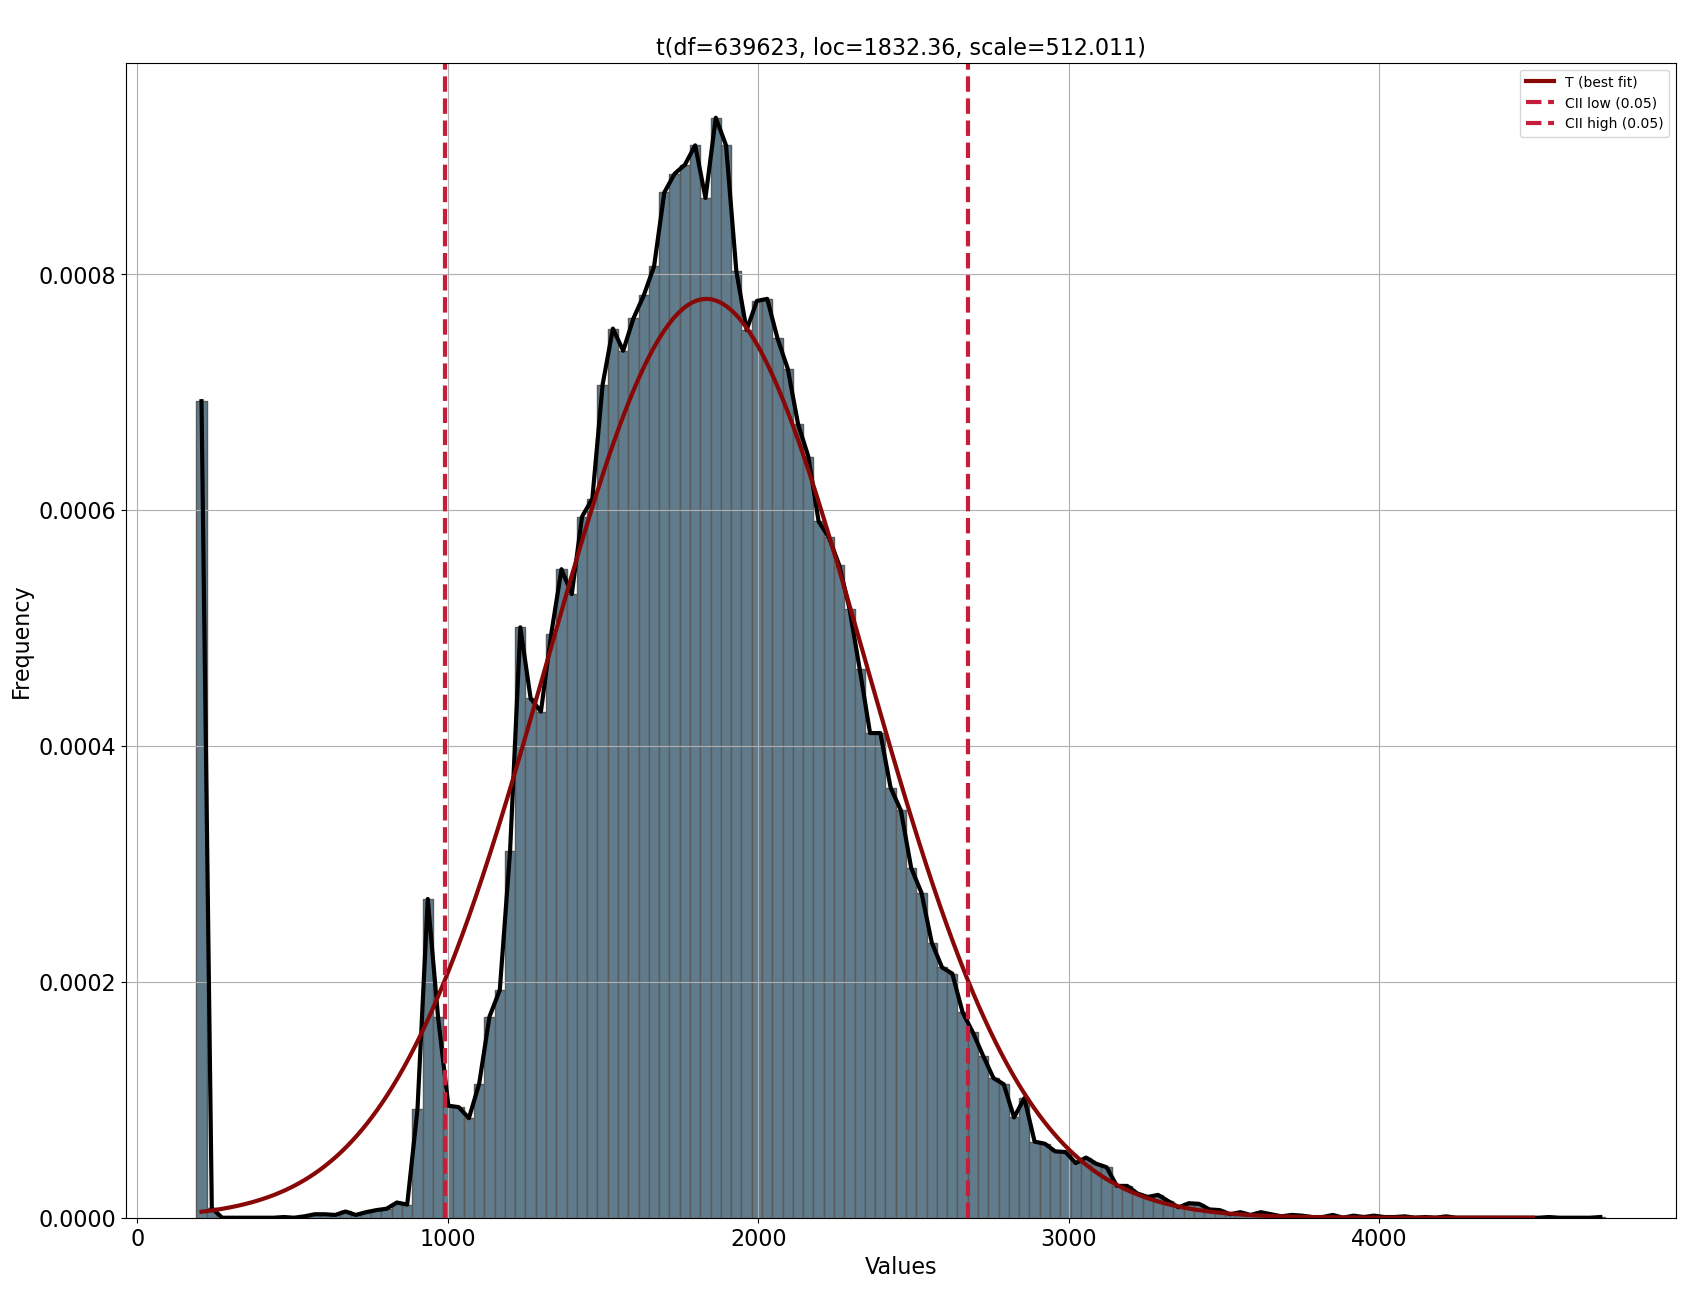

In [7]:
dfit = distfit.distfit(todf=True)
results = dfit.fit_transform(df['gameDuration'])

dfit.plot()

In [8]:
# Delete the "remaked matches" (time < 3 minutes) and "surrendered matches" (time > 3 minutes and < 15 minutes) in the file.

print("remake: ", df[df['gameDuration'] <= 300].shape[0],"  between remake and surrender: ", df[((df['gameDuration'] > 300) & (df['gameDuration']<900))].shape[0])

df = df[~((df['gameDuration'] < 900) & (df['gameDuration']>0))]
df_model = df.copy()

remake:  1195   between remake and surrender:  114


[28-08-2025 09:23:43] [distfit.distfit] [INFO] fit
[28-08-2025 09:23:43] [distfit.distfit] [INFO] transform
[28-08-2025 09:23:43] [distfit.distfit] [INFO] [norm      ] [0.00 sec] [RSS: 2.50123e-07] [loc=1873.638 scale=448.629]
[28-08-2025 09:23:43] [distfit.distfit] [INFO] [expon     ] [0.00 sec] [RSS: 9.88751e-06] [loc=901.000 scale=972.638]
[28-08-2025 09:23:43] [distfit.distfit] [INFO] [pareto    ] [0.02 sec] [RSS: 9.88751e-06] [loc=-137438952571.000 scale=137438953472.000]
[28-08-2025 09:23:44] [distfit.distfit] [INFO] [dweibull  ] [0.29 sec] [RSS: 7.53606e-07] [loc=1857.378 scale=380.519]
[28-08-2025 09:23:45] [distfit.distfit] [INFO] [t         ] [0.98 sec] [RSS: 2.50121e-07] [loc=1873.638 scale=448.628]
[28-08-2025 09:23:45] [distfit.distfit] [INFO] [genextreme] [0.46 sec] [RSS: 3.70552e-05] [loc=902.920 scale=8.774]
[28-08-2025 09:23:45] [distfit.distfit] [INFO] [gamma     ] [0.07 sec] [RSS: 1.42055e-07] [loc=-158.783 scale=99.201]
[28-08-2025 09:23:45] [distfit.distfit] [INFO]

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nlognorm(s=0.146721, loc=-1169.96, scale=3011.02)'}, xlabel='Values', ylabel='Frequency'>)

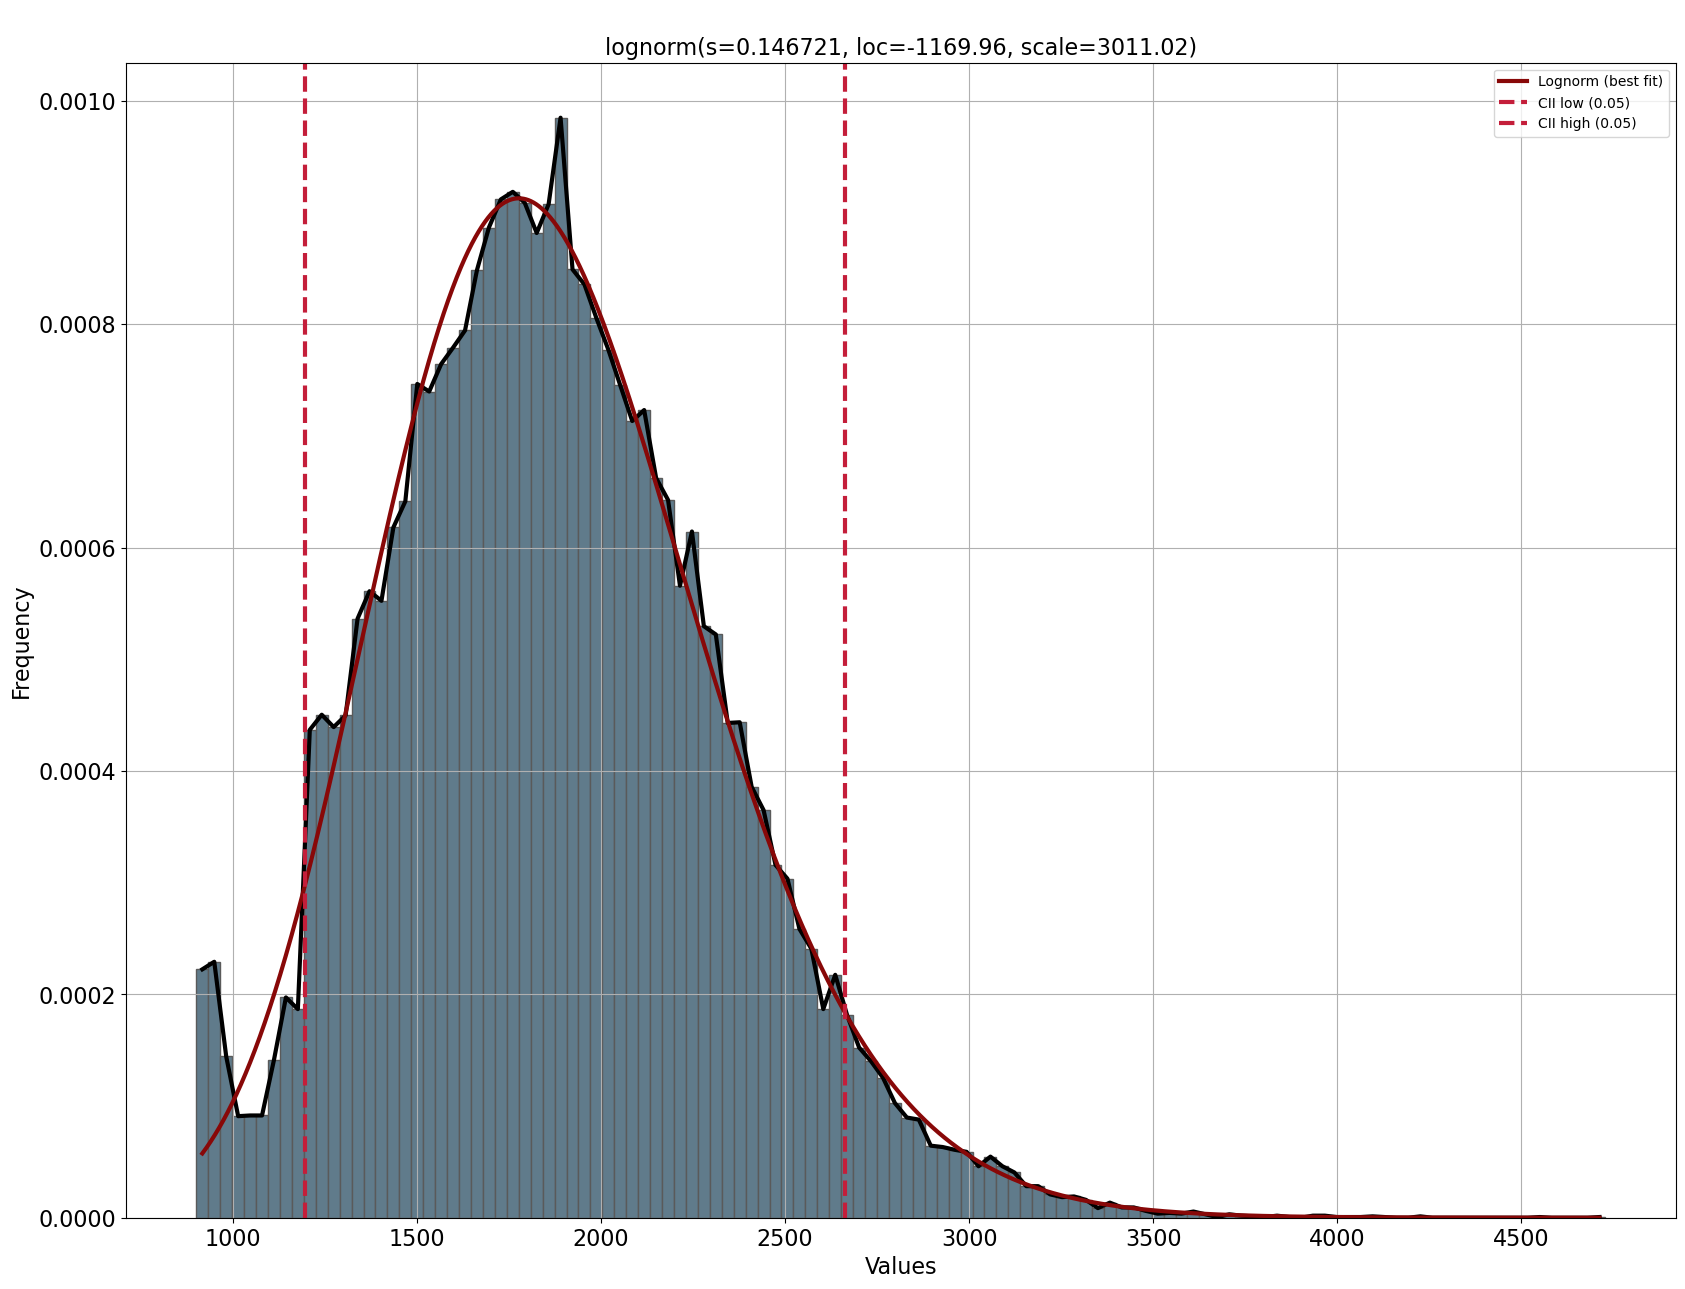

In [9]:
dfit = distfit.distfit(todf=True)
results = dfit.fit_transform(df['gameDuration'])

dfit.plot()

In [ ]:
# After cleaning the data, an analysis was conducted on the impact of champions' ban/pick rates on the winning rate.

champs_t1, champs_t2, bans_t1, bans_t2 = [],[],[],[]

for column in df.columns:
    if 'id' in column:
        if 't1' in column and column not in champs_t1:
            champs_t1.append(column)
        elif 't2' in column and column not in champs_t2:
            champs_t2.append(column)
    if 'ban' in column:
        if 't1' in column and column not in bans_t1:
            bans_t1.append(column)
        elif 't2' in column and column not in bans_t2:
            bans_t2.append(column)

In [ ]:
df['picks'] = df[champs_t1 + champs_t2].values.tolist()
df['bans'] = df[bans_t1 + bans_t2].values.tolist()
df['comp'] = df[champs_t1 + champs_t2].values.tolist()

win_condition = df['winner'] == 1
df['win/lose'] = win_condition.apply(
    lambda x: [1, 1, 1, 1, 1, 0, 0, 0, 0, 0] if x else [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
)

df_exploded = df.explode(['picks', 'bans', 'win/lose'])

pick_id = df_exploded['picks'].value_counts().reset_index()
pick_id.columns = ['id', 'picks']

ban_id = df_exploded['bans'].value_counts().reset_index()
ban_id.columns = ['id', 'bans']

winrate_id = df_exploded.groupby('picks')['win/lose'].sum().reset_index()
winrate_id.columns = ['id', 'win/lose']

df_champion_stats = pd.merge(pick_id, ban_id, on='id', how='outer')
df_champion_stats = pd.merge(df_champion_stats, winrate_id, on='id', how='outer')

df_champion_stats.fillna(0, inplace=True)

df_champion_stats['picked or banned (%)'] = (df_champion_stats['picks'] + df_champion_stats['bans']) * 100 / df.shape[0]
df_champion_stats['relevance (%)'] = df_champion_stats['picks'] / (df.shape[0] - df_champion_stats['bans']) * 100
df_champion_stats['winrate (%)'] = df_champion_stats['win/lose'] / df_champion_stats['picks'] * 100

df_champion_stats['relevance (%)'].replace([np.inf, -np.inf], 0, inplace=True)
df_champion_stats['winrate (%)'].replace([np.inf, -np.inf], 0, inplace=True)

df_champion_stats[['picked or banned (%)', 'relevance (%)', 'winrate (%)']] = df_champion_stats[['picked or banned (%)', 'relevance (%)', 'winrate (%)']].round(2)

df_champion_stats = pd.merge(champs_df, df_champion_stats, on='id')

df_champion_stats = df_champion_stats.sort_values('winrate (%)', ascending=False)

df_champion_stats

,id,name,role,picks,bans,win/lose,picked or banned (%),relevance (%),winrate (%)
39,40,Janna,"[Support, Mage]",8467.0,20921,4711,58.56,28.94,55.64
36,37,Sona,"[Support, Mage]",5298.0,595,2880,11.74,10.68,54.36
73,83,Yorick,"[Fighter, Tank]",1337.0,496,723,3.65,2.69,54.08
32,33,Rammus,"[Tank, Fighter]",2930.0,1798,1578,9.42,6.06,53.86
33,34,Anivia,"[Mage, Support]",2192.0,857,1177,6.08,4.44,53.70
...,...,...,...,...,...,...,...,...,...
68,78,Poppy,"[Tank, Fighter]",1840.0,155,832,3.98,3.68,45.22
42,43,Karma,"[Mage, Support]",3045.0,211,1372,6.49,6.09,45.06
128,268,Azir,"[Mage, Marksman]",1241.0,403,539,3.28,2.49,43.43
12,13,Ryze,"[Mage, Fighter]",1009.0,95,410,2.20,2.01,40.63


In [ ]:
# From then on, it is possible to analyze the types of champions selected and determine the most picked roles.

df_comps = df[['gameId','winner','comp_1','comp_2']]
df_comps = df_comps.explode(['comp_1','comp_2'])

df_comps = pd.merge(df_comps,champs_df.rename(columns={'id': 'comp_1','name':'name_1','role':'role_1'}), on='comp_1', sort=False)


df_comps = pd.merge(df_comps,champs_df.rename(columns={'id': 'comp_2','name':'name_2','role':'role_2'}), on='comp_2', sort=False)

df_comps = df_comps.sort_values('gameId')

df_comps = df_comps.groupby('gameId').agg(
    {'comp_1': list, 
     'comp_2': list,
     'name_1': list,
     'name_2': list,
     'role_1': lambda x: [x.tolist()], 
     'role_2': lambda x: [x.tolist()], 
     'winner': 'first'
    }
).reset_index()

df_comps

def unnest_array(array):
    unnested_array = sorted([item for sublist in array for sublist_2 in sublist for item in sublist_2], key=lambda x: x.lower())
    return sorted(list(set(unnested_array)), key=lambda x: x.lower())

df_comps['role_1'] = df_comps['role_1'].apply(unnest_array)
df_comps['role_2'] = df_comps['role_2'].apply(unnest_array)

df_comps['name_1'] = df_comps['name_1'].apply(sorted)
df_comps['name_2'] = df_comps['name_2'].apply(sorted)

In [ ]:
# Get most picked roles.
df_comps['role_1'] = df_comps['role_1'].astype(str)
df_comps['role_2'] = df_comps['role_2'].astype(str)

pd.concat([df_comps['role_1'],df_comps['role_2']]).value_counts()

['Assassin', 'Fighter', 'Mage', 'Marksman', 'Support', 'Tank']    49230
['Assassin', 'Fighter', 'Mage', 'Marksman', 'Support']            18514
['Fighter', 'Mage', 'Marksman', 'Support', 'Tank']                10320
['Assassin', 'Fighter', 'Mage', 'Marksman', 'Tank']                8468
['Assassin', 'Fighter', 'Marksman', 'Support', 'Tank']             4496
['Assassin', 'Fighter', 'Marksman', 'Tank']                        1763
['Assassin', 'Fighter', 'Mage', 'Marksman']                        1144
['Assassin', 'Fighter', 'Marksman', 'Support']                     1021
['Fighter', 'Mage', 'Marksman', 'Tank']                             975
['Assassin', 'Mage', 'Marksman', 'Support', 'Tank']                 854
['Fighter', 'Mage', 'Marksman', 'Support']                          632
['Assassin', 'Fighter', 'Mage', 'Support', 'Tank']                  526
['Assassin', 'Mage', 'Marksman', 'Support']                         330
['Mage', 'Marksman', 'Support', 'Tank']                         

In [ ]:
# Get most picked champions compositions.
df_comps['name_1'] = df_comps['name_1'].astype(str)
df_comps['name_2'] = df_comps['name_2'].astype(str)

pd.concat([df_comps['name_1'],df_comps['name_2']]).value_counts()

['Karma', 'Kayle', 'Master Yi', 'Orianna', 'Vayne']             4
['Ahri', 'Blitzcrank', 'Kayn', 'Malphite', 'Tristana']          3
['Orianna', 'Sejuani', 'Thresh', 'Tryndamere', 'Twitch']        3
['Blitzcrank', 'Jarvan IV', 'Lee Sin', 'Orianna', 'Twitch']     3
['Jhin', 'Lee Sin', 'Nasus', 'Thresh', 'Ziggs']                 3
                                                               ..
['Braum', 'Heimerdinger', 'Kalista', 'Shen', 'Twisted Fate']    1
['Evelynn', 'Soraka', 'Syndra', 'Twitch', 'Urgot']              1
['Bard', 'Ekko', 'Hecarim', 'Jax', 'Lucian']                    1
['Ekko', 'Jarvan IV', 'Kalista', 'Lulu', 'Riven']               1
['Diana', 'Jax', 'Lee Sin', 'Soraka', 'Varus']                  1
Name: count, Length: 98889, dtype: int64

In [ ]:
# Due to the existence of the champions Ban/Pick system, the most popular team compositions actually rarely appear on the battlefield. So we no longer calculate the winning rates of different lineup combinations.
# Next, we will arrange the winning rates of different picked roles.
df_comps_winrate = df_comps[df_comps['role_1'] != df_comps['role_2']]
results_data = []

for _, row in df_comps_winrate.iterrows():
    comp_winner = row['role_' + str(row['winner'])]
    comp_loser = row['role_' + str(row['winner'] % 2 + 1)]
    
    results_data.append({'comp': comp_winner, 'winner': 1})
    results_data.append({'comp': comp_loser, 'winner': 0})

results = pd.DataFrame(results_data)

comp_report = results.groupby('comp').agg({
    'winner': ['sum','count']
})

comp_report['winner','winrate'] = round(100*comp_report['winner']['sum']/comp_report['winner']['count'],2)

comp_report.sort_values(('winner','winrate'),ascending=False)

winner               
                                                      sum  count winrate
comp                                                                    
['Fighter', 'Marksman', 'Support']                      3      4   75.00
['Assassin', 'Marksman', 'Support', 'Tank']             2      3   66.67
['Assassin', 'Fighter', 'Support']                      2      3   66.67
['Fighter', 'Marksman', 'Tank']                        28     47   59.57
['Assassin', 'Fighter', 'Support', 'Tank']             20     35   57.14
['Fighter', 'Mage', 'Tank']                             7     13   53.85
['Assassin', 'Mage', 'Marksman']                        7     13   53.85
['Assassin', 'Fighter', 'Mage', 'Support']             66    124   53.23
['Assassin', 'Mage', 'Marksman', 'Tank']               28     53   52.83
['Assassin', 'Fighter', 'Mage', 'Marksman', 'Su...  12934  24950   51.84
['Assassin', 'Fighter', 'Tank']                        11     22   50.00
['Mage', 'Marksman', 'Support']                        16     32   50.00
['Fighter', 'Mage', 'Marksman', 'Tank']               485    971   49.95
['Assassin', 'Mage', 'Marksman', 'Support', 'Ta...    422    846   49.88
['Fighter', 'Mage', 'Marksman', 'Support']            315    632   49.84
['Assassin', 'Fighter', 'Mage', 'Marksman', 'Su...   7536  15172   49.67
['Assassin', 'Fighter', 'Mage', 'Marksman', 'Ta...   3902   7858   49.66
['Fighter', 'Mage', 'Marksman', 'Support', 'Tank']   4540   9306   48.79
['Assassin', 'Fighter', 'Mage', 'Support', 'Tank']    249    512   48.63
['Assassin', 'Fighter', 'Mage', 'Marksman']           542   1130   47.96
['Assassin', 'Fighter', 'Marksman', 'Support']        486   1015   47.88
['Assassin', 'Fighter', 'Marksman', 'Support', ...   2068   4320   47.87
['Fighter', 'Marksman', 'Support', 'Tank']             99    208   47.60
['Assassin', 'Mage', 'Marksman', 'Support']           155    330   46.97
['Assassin', 'Fighter', 'Marksman', 'Tank']           802   1739   46.12
['Assassin', 'Fighter', 'Mage', 'Tank']                78    170   45.88
['Mage', 'Marksman', 'Support', 'Tank']               128    281   45.55
['Assassin', 'Fighter', 'Mage']                         7     16   43.75
['Fighter', 'Mage', 'Support', 'Tank']                 39    110   35.45
['Assassin', 'Fighter', 'Marksman']                    23     65   35.38
['Fighter', 'Mage', 'Support']                          1      3   33.33
['Fighter', 'Mage', 'Marksman']                         4     14   28.57
['Mage', 'Marksman', 'Tank']                            0      4    0.00
['Assassin', 'Mage', 'Support']                         0      1    0.00
['Fighter', 'Tank']                                     0      1    0.00
['Fighter', 'Support', 'Tank']                          0      4    0.00
['Assassin', 'Marksman', 'Support']                     0      2    0.00
['Mage', 'Support', 'Tank']                             0      1    0.00

In [44]:
# Next, let's analyze the impact of the following factors on the winning rate.
#1st Inhib, 1st Baron, 1st Tower, 1st Dragon, 1st Herald, 1st Blood

df_1st = df.iloc[:,4:11]

df_1stwr = pd.DataFrame(columns=df_1st.columns[df_1st.columns != 'winner'] + ' (%)')

for column in df_1st.columns[df_1st.columns != 'winner']:
    df_1stwr.loc[0,column + ' (%)'] = round(100*df[((df['winner'] == df[column]) & \
                                                  (df[column] != 0))].shape[0] / \
                                       df[df[column] != 0].shape[0], 2)

df_1stwr

,firstBlood (%),firstTower (%),firstInhibitor (%),firstBaron (%),firstDragon (%),firstRiftHerald (%)
0,59.0,70.76,91.08,80.68,68.0,69.45


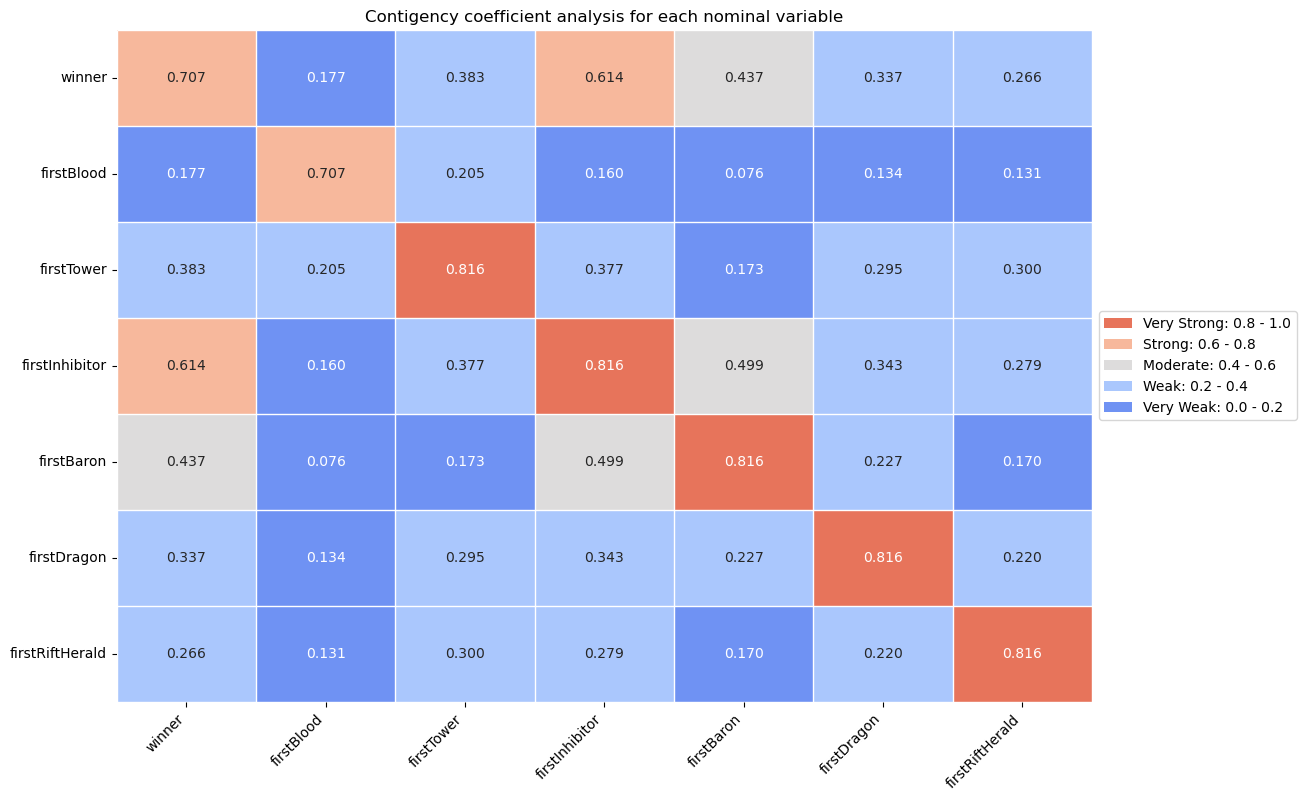

In [ ]:
# Next, we will analyze the correlation between these factors and the winning rate, and this will be presented through a heat map.

from scipy.stats import chi2_contingency

kill_columns = [column for column in df.columns if 'Kills' in column]
first_objectives = [column for column in df.columns if 'first' in column]

df_corr = df[['winner']+kill_columns+first_objectives]


def chi2_analysis(variable1,variable2):
    contingency_table = pd.crosstab(variable1,variable2)
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.values.sum()
    contingency_coef = np.sqrt(chi2/(chi2+n))
    return contingency_coef



import seaborn as sns

from matplotlib.colors import ListedColormap

variables = ['winner'] + first_objectives
n_variables = len(variables)
df_matrix = np.zeros((n_variables, n_variables))

for i in range(n_variables):
    for j in range(n_variables):
        result = chi2_analysis(df_corr[variables[i]], df_corr[variables[j]])
        df_matrix[i, j] = result

category_bounds = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
categories = ['Very Weak', 'Weak', 'Moderate', 'Strong', 'Very Strong']

df_heatmap = pd.DataFrame(df_matrix, index=variables, columns=variables)

colors = sns.color_palette('coolwarm', len(categories))
cmap = ListedColormap(colors)


fig, ax = plt.subplots(figsize=(15, 8))


sns.heatmap(df_matrix,
            cmap=cmap,
            fmt=".3f",
            cbar=False,
            ax=ax,
            linecolor='white',
            vmin=0,
            vmax=1,
           annot = True)


ax.hlines(np.arange(n_variables+1), *ax.get_xlim(), color='white', linewidth=1)
ax.vlines(np.arange(n_variables+1), *ax.get_ylim(), color='white', linewidth=1)

ax.set_xticks(np.arange(df_matrix.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_matrix.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(df_heatmap.columns, rotation=45, ha="right")
ax.set_yticklabels(df_heatmap.index, rotation=0)

ax.set_title('Contigency coefficient analysis for each nominal variable')

legend_labels = [f'{category}: {category_bounds[i]:.1f} - {category_bounds[i+1]:.1f}' for i, category in enumerate(categories)]
legend_elements = [plt.Rectangle((0, 0), 1, 1, fc=colors[i]) for i in range(len(categories))]

legend_elements = legend_elements[::-1]
legend_labels = legend_labels[::-1]

ax.legend(handles=legend_elements, labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplots_adjust(left=0.25, top=0.95)

plt.show()

Based on the information derived from the above analysis, we can use it to build a machine learning model and predict the winning rates of different competitions.

In [46]:
sum_columns = [columns for columns in df.columns if 'sum' in columns]
target = df['winner']
df_model.drop(['gameId','creationTime','seasonId','winner']+bans_t1+bans_t2,axis=1, inplace=True)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


def model_and_results(features,target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    model = RandomForestClassifier()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    print("confusion matrix:")
    print(confusion_matrix(y_test, y_pred))


    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)


    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)


    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)


    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)
    
    importances = model.feature_importances_

    importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances})
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    print('\n\n',importance_df)

In [48]:
print('With every bit of information:')
features = df_model

model_and_results(features,target)

With every bit of information:
confusion matrix:
[[4984  100]
 [ 113 4840]]
Accuracy: 0.9787785194779317
Precision: 0.9778300961349814
Recall: 0.980330448465775
F1-Score: 0.979078675965033


                Feature  Importance
22       t1_towerKills    0.192546
42       t2_towerKills    0.189127
23   t1_inhibitorKills    0.140854
43   t2_inhibitorKills    0.136806
3       firstInhibitor    0.086901
25      t1_dragonKills    0.032917
45      t2_dragonKills    0.032399
44       t2_baronKills    0.026065
4           firstBaron    0.022837
24       t1_baronKills    0.018136
2           firstTower    0.017496
0         gameDuration    0.013270
5          firstDragon    0.011310
19         t1_champ5id    0.003761
39         t2_champ5id    0.003720
7          t1_champ1id    0.003715
33         t2_champ3id    0.003657
10         t1_champ2id    0.003615
13         t1_champ3id    0.003593
16         t1_champ4id    0.003571
6      firstRiftHerald    0.003530
27         t2_champ1id    0.003481
30 

From the accuracy rate of the results obtained through machine learning, it can be seen that the accuracy rate of the model's predictions is still very good. Under the condition of complete information, it can reach an accuracy rate of around 98%, proving that the results of this modeling are very excellent.